# CS 133 Term Project
By Group 6: Andrew Gong, Emily Lu, Ryuji Brioso, Ayman Rabia  
Dataset: [Global Video Game Sales](https://www.kaggle.com/datasets/thedevastator/global-video-game-sales) from Kaggle  








## Dataset & 5 Questions
Load dataset, create and answer 5 unique questions using different types of plots to help understand the data.

### Load Dataset

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import kagglehub
from kagglehub import KaggleDatasetAdapter

file_path = "vgsales.csv"

df = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "thedevastator/global-video-game-sales",
  file_path
)

df.head()

/tmp/ipython-input-1616425574.py:9: DeprecationWarning: Use dataset_load() instead of load_dataset(). load_dataset() will be removed in a future version.
  df = kagglehub.load_dataset(


100%|██████████| 381k/381k [00:00<00:00, 74.7MB/s]

Extracting zip of vgsales.csv...


,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


### Q1:  Which platform has the best sale?
**Result**: PS2 has the highest golbal sales by platform for over 1200 million dollars, follow by X360, PS3, and Wii for nearly 1000 million dollars.


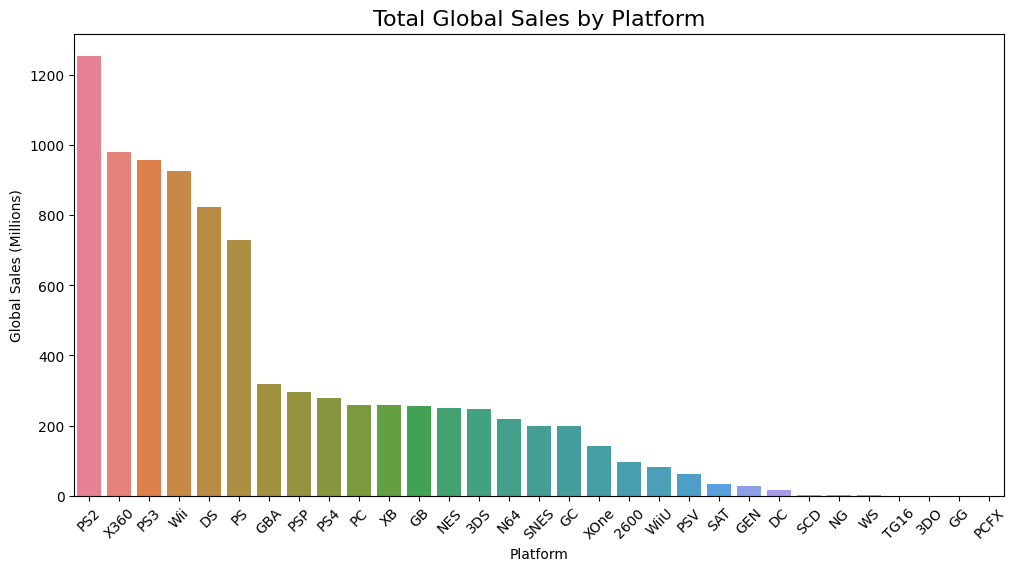

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

platform_sales = df.groupby("Platform")["Global_Sales"].sum().sort_values(ascending=False)

plt.figure(figsize=(12,6))
sns.barplot(x=platform_sales.index, y=platform_sales.values, hue = platform_sales.index, legend=False)
plt.title("Total Global Sales by Platform", fontsize=16)
plt.ylabel("Global Sales (Millions)")
plt.xticks(rotation=45)
plt.show()


### Q2: Which region had the best sales performance?
**Result**: North America has the highest total sales for over 4000 million dollars, follow by Europe for over 2000 million dollar.

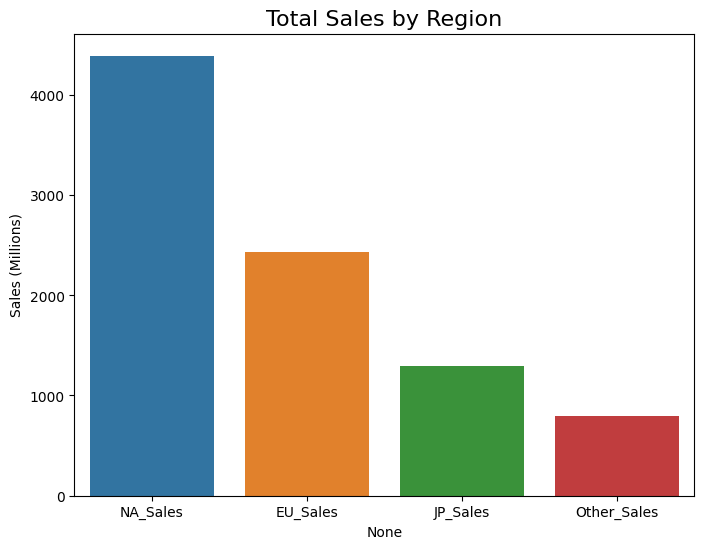

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

region_totals = df[["NA_Sales", "EU_Sales", "JP_Sales", "Other_Sales"]].sum()

plt.figure(figsize=(8,6))
sns.barplot(x=region_totals.index, y=region_totals.values, hue = region_totals.index, legend=False)
plt.title("Total Sales by Region", fontsize=16)
plt.ylabel("Sales (Millions)")
plt.show()


### Q3: Which genre sells better in which region?
**Result**:
* Genres dominate NA: Action, followed by Sports
* Genres dominate EU: Action, then Sports
* Genres dominate JP: RPG, followed by Action




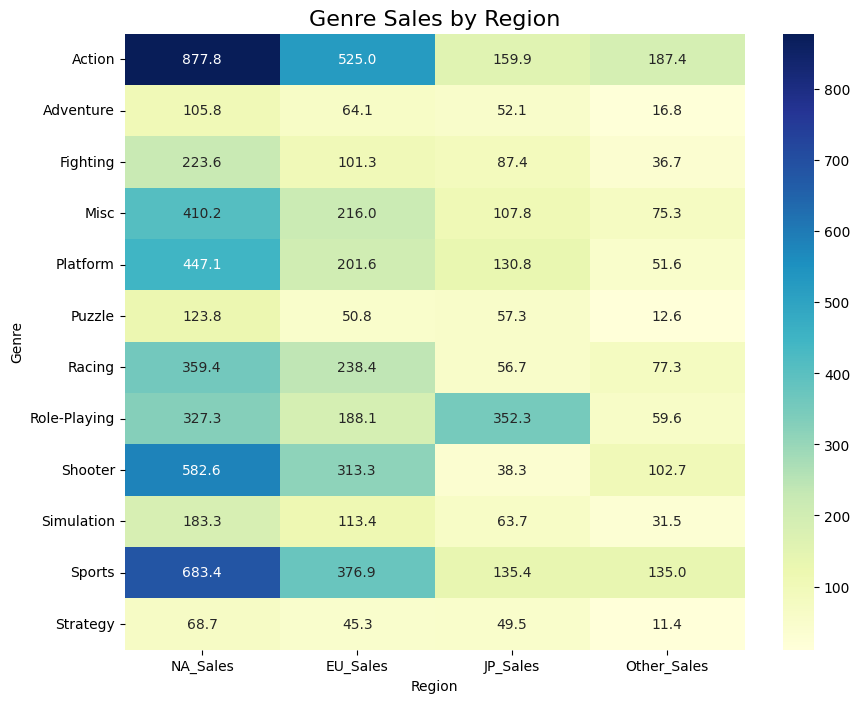

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

genre_region_sales = df.groupby("Genre")[["NA_Sales", "EU_Sales", "JP_Sales", "Other_Sales"]].sum()

plt.figure(figsize=(10,8))
sns.heatmap(genre_region_sales, annot=True, fmt=".1f", cmap="YlGnBu")
plt.title("Genre Sales by Region", fontsize=16)
plt.xlabel("Region")
plt.ylabel("Genre")
plt.show()


### Q4: How do global sales change over the years?


/tmp/ipython-input-3853580395.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['Year'] = df_clean['Year'].astype(int)


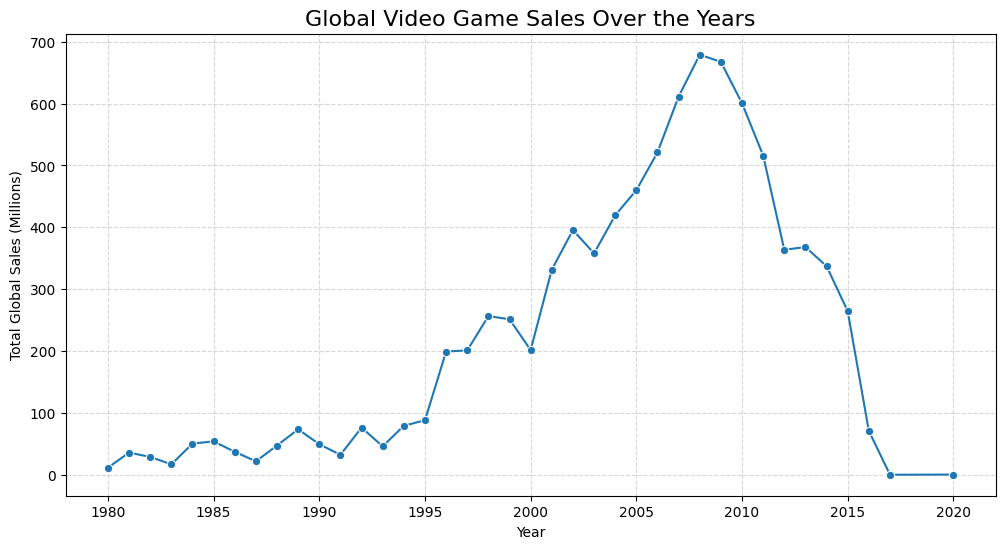

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

df_clean = df.dropna(subset=['Year'])
df_clean['Year'] = df_clean['Year'].astype(int)

# Aggregate global sales per year
sales_per_year = df_clean.groupby('Year')['Global_Sales'].sum().reset_index()

plt.figure(figsize=(12,6))
sns.lineplot(data=sales_per_year, x='Year', y='Global_Sales', marker='o')
plt.title('Global Video Game Sales Over the Years', fontsize=16)
plt.xlabel('Year')
plt.ylabel('Total Global Sales (Millions)')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()


### Q5: Which company/publisher makes the most of which genre?

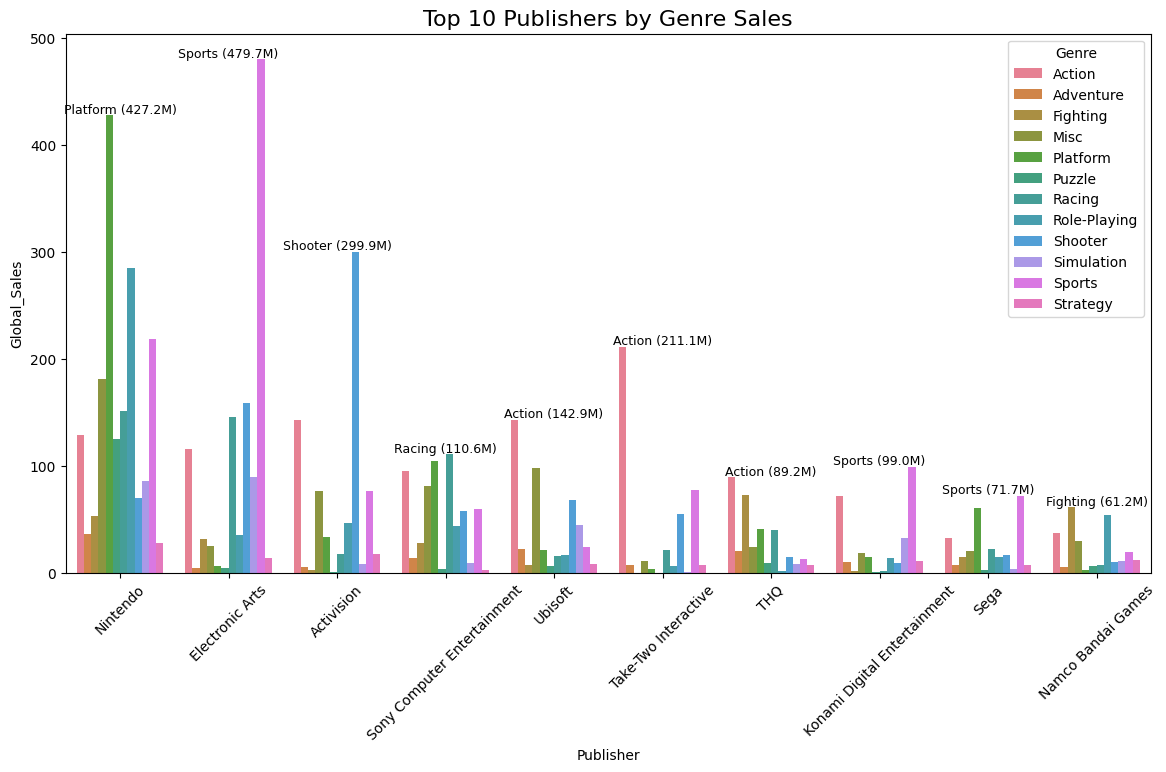

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Custom order (from 1st publisher to 10th publisher)
custom_order = [
    'Nintendo', 'Electronic Arts', 'Activision',
    'Sony Computer Entertainment', 'Ubisoft',
    'Take-Two Interactive', 'THQ', 'Konami Digital Entertainment',
    'Sega', 'Namco Bandai Games'
]

# ---- Prepare data ----
publisher_genre = df.groupby(['Publisher','Genre'])['Global_Sales'].sum().reset_index()

top_publishers = publisher_genre.groupby('Publisher')['Global_Sales'].sum().sort_values(ascending=False).head(10).index

# Filter only publishers in custom order
top_pub_data = publisher_genre[publisher_genre['Publisher'].isin(custom_order)]

# Total sales per publisher (for finding top genre)
top_10_publishers = top_pub_data.groupby('Publisher')['Global_Sales'].sum().reindex(custom_order)

# ---- PLOT ----
plt.figure(figsize=(14,7))
ax = sns.barplot(
    data=top_pub_data,
    x='Publisher',
    y='Global_Sales',
    hue='Genre',
    order=custom_order   # enforce custom order
)
plt.xticks(rotation=45)
plt.title('Top 10 Publishers by Genre Sales', fontsize=16)

# ---- NEW: Add labels for top genre per publisher ----
# Find top genre per publisher
top_genre_labels = (
    publisher_genre[publisher_genre['Publisher'].isin(top_publishers)]
    .sort_values(['Publisher', 'Global_Sales'], ascending=[True, False])
    .groupby('Publisher')
    .first()  # selects highest-selling genre
)

# Add text annotations above each publisher
for i, publisher in enumerate(top_publishers):
    genre = top_genre_labels.loc[publisher, 'Genre']
    value = top_genre_labels.loc[publisher, 'Global_Sales']

    ax.text(
        i,                     # x-position
        value + 2,             # y-position slight offset above bar
        f"{genre} ({value:.1f}M)",
        ha='center', fontsize=9, color='black'
    )

plt.show()




## Machine Learning - Regression
**Problem**: Predict NA sales based on Platform, Genre, Publisher, EU sales, JP sales, other sales  
  
**3 Models**: Linear Regression, Decision Tree Regressor, and Random Forest Regressor  
  
**Best Model**:  


### Load Dataset & EDA

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import kagglehub
from kagglehub import KaggleDatasetAdapter

file_path = "vgsales.csv"

df = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "thedevastator/global-video-game-sales",
  file_path
)

/tmp/ipython-input-4202287757.py:9: DeprecationWarning: Use dataset_load() instead of load_dataset(). load_dataset() will be removed in a future version.
  df = kagglehub.load_dataset(


Using Colab cache for faster access to the 'global-video-game-sales' dataset.


#### 1. EDA

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


<Axes: xlabel='Genre'>

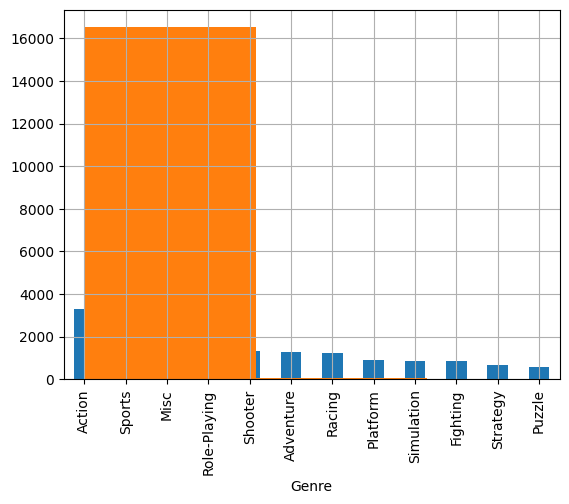

In [ ]:
import pandas as pd

df.info()
df.describe()
df.isnull().sum()


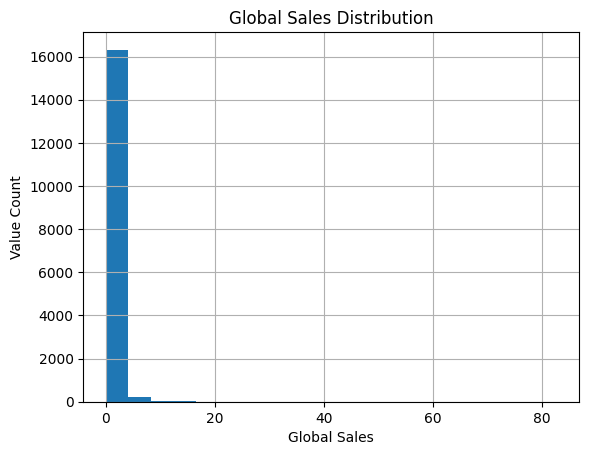

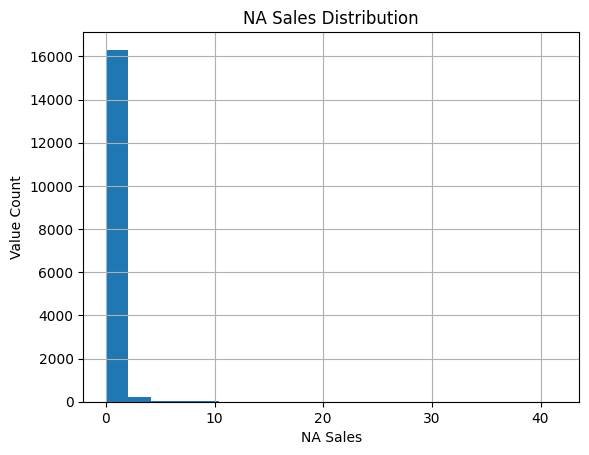

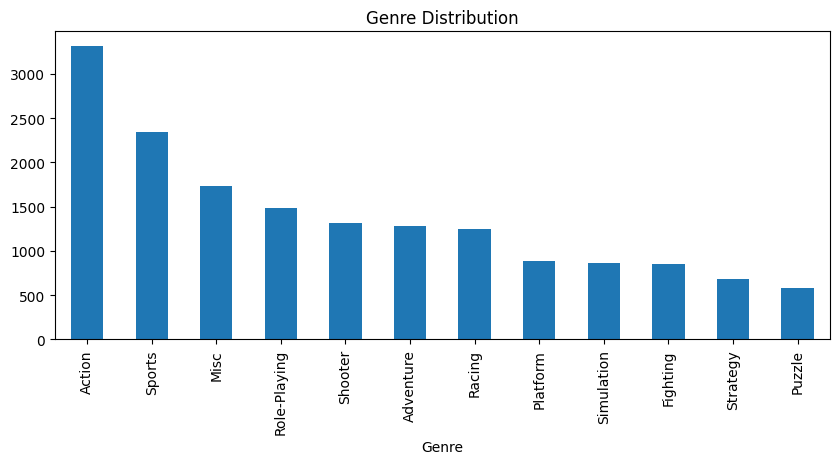

In [4]:
df["Global_Sales"].hist(bins=20)
plt.title("Global Sales Distribution")
plt.xlabel("Global Sales")
plt.ylabel("Value Count")
plt.show()

df["NA_Sales"].hist(bins=20)
plt.title("NA Sales Distribution")
plt.xlabel("NA Sales")
plt.ylabel("Value Count")
plt.show()

df["Genre"].value_counts().plot(kind="bar", figsize=(10,4))
plt.title("Genre Distribution")
plt.show()


In [ ]:
df.corr(numeric_only=True)["NA_Sales"].sort_values()


,NA_Sales
Rank,-0.401362
Year,-0.091402
JP_Sales,0.449787
Other_Sales,0.634737
EU_Sales,0.767727
Global_Sales,0.941047
NA_Sales,1.000000


### Linear Regression
Test RMSE for Ridge: 0.24310272388104465

#### Load Data

In [40]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import kagglehub
from kagglehub import KaggleDatasetAdapter

file_path = "vgsales.csv"

df = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "thedevastator/global-video-game-sales",
  file_path
)

/tmp/ipython-input-4202287757.py:9: DeprecationWarning: Use dataset_load() instead of load_dataset(). load_dataset() will be removed in a future version.
  df = kagglehub.load_dataset(


Using Colab cache for faster access to the 'global-video-game-sales' dataset.


#### 2. Train Test Split

In [41]:
from sklearn.model_selection import train_test_split

df = df.drop(columns=["Name", "Global_Sales"])   # avoid leakage
df = df.dropna()

X = df.drop(columns=["NA_Sales"])
y = df["NA_Sales"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


#### 3. Preprocessing

In [42]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline

numeric_features = ["Rank", "Year", "EU_Sales", "JP_Sales", "Other_Sales"]
categorical_features = ["Platform", "Genre", "Publisher"]

numeric_transformer = Pipeline(steps=[
    ("scaler", StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
])

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features)
    ]
)


#### 4. Pipeline

In [43]:
from sklearn.linear_model import LinearRegression

linreg_pipeline = Pipeline(steps=[
    ("preprocess", preprocessor),
    ("model", LinearRegression())
])


#### 5. Cross Validation

In [44]:
from sklearn.model_selection import cross_val_score
import numpy as np

scores = cross_val_score(
    linreg_pipeline, X_train, y_train,
    cv=5, scoring="neg_mean_squared_error"
)

rmse = np.sqrt(-scores.mean())
print("Linear Regression CV RMSE:", rmse)



Linear Regression CV RMSE: 0.49971891798756324


#### 6. Hyperparameter Tuning

In [45]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import GridSearchCV


param_grid = {
    "LinearRegression": {},
    "Ridge": {
        "model": [Ridge()],
        "model__alpha": [0.01, 0.1, 1, 5, 10, 50, 100]
    },
    "Lasso": {
        "model": [Lasso(max_iter=5000)],
        "model__alpha": [0.001, 0.01, 0.1, 1, 10]
    }
}

model_results = {}

for model_name, grid in param_grid.items():
    if grid:
        gs = GridSearchCV(linreg_pipeline, grid, cv=5, scoring="neg_mean_squared_error", n_jobs=-1)
        gs.fit(X_train, y_train)
        best_rmse = np.sqrt(-gs.best_score_)
        model_results[model_name] = (best_rmse, gs.best_estimator_)
        print(f"{model_name} best RMSE: {best_rmse}")
    else:
        # LinearRegression without hyperparameters
        scores = cross_val_score(linreg_pipeline, X_train, y_train, cv=5, scoring="neg_mean_squared_error")
        rmse = np.sqrt(-scores.mean())
        model_results[model_name] = (rmse, linreg_pipeline.fit(X_train, y_train))
        print(f"{model_name} CV RMSE: {rmse}")


LinearRegression CV RMSE: 0.49971891798756324
Ridge best RMSE: 0.4981740331930595
Lasso best RMSE: 0.500843908717589


#### 7. Refit and Evaluate

In [46]:
from sklearn.metrics import mean_squared_error

# Select best model
best_lg_name = min(model_results, key=lambda k: model_results[k][0])
best_rmse, best_lg = model_results[best_lg_name]

print(f"Best model: {best_lg_name} with CV RMSE: {best_rmse}")

# Evaluate on test set
y_pred = best_lg.predict(X_test)
test_rmse = mean_squared_error(y_test, y_pred)
print(f"Test RMSE for {best_lg_name}: {test_rmse}")


Best model: Ridge with CV RMSE: 0.4981740331930595
Test RMSE for Ridge: 0.24310272388104465


### Decision Tree Regressor
Decision Tree Test RMSE: 0.29865550974225225


#### Load Data

In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import kagglehub
from kagglehub import KaggleDatasetAdapter

file_path = "vgsales.csv"

df = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "thedevastator/global-video-game-sales",
  file_path
)

/tmp/ipython-input-4202287757.py:9: DeprecationWarning: Use dataset_load() instead of load_dataset(). load_dataset() will be removed in a future version.
  df = kagglehub.load_dataset(


Using Colab cache for faster access to the 'global-video-game-sales' dataset.


#### 2. Train Test Split

In [19]:
from sklearn.model_selection import train_test_split

df = df.drop(columns=["Name", "Global_Sales"])   # avoid leakage
df = df.dropna()

X = df.drop(columns=["NA_Sales"])
y = df["NA_Sales"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


#### 3. Preprocessing

In [20]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline

numeric_features = ["Rank", "Year", "EU_Sales", "JP_Sales", "Other_Sales"]
categorical_features = ["Platform", "Genre", "Publisher"]

numeric_transformer = Pipeline(steps=[
    ("scaler", StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
])

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features)
    ]
)


#### 4. Pipeline

In [21]:
from sklearn.tree import DecisionTreeRegressor

model = Pipeline([
    ("preprocess", preprocessor),
    ("model", DecisionTreeRegressor(random_state=42))
])


#### 5. Cross Validation

In [22]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(
    model, X_train, y_train,
    scoring="neg_mean_squared_error",
    cv=5
)

print("Decision Tree Regressor CV RMSE:", (-scores.mean())**0.5)


RMSE: 0.3162888935660724


#### 6. Hyperparameter Tuning Using GridSearchCV

In [23]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    "model__max_depth": [None, 5, 10, 20, 30],
    "model__min_samples_split": [2, 5, 10],
    "model__min_samples_leaf": [1, 2, 4],
    "model__max_features": [None, "sqrt", "log2"]
}

grid = GridSearchCV(
    model, param_grid, cv=5, scoring="neg_mean_squared_error", n_jobs=-1
)

grid.fit(X_train, y_train)

best_dt = grid.best_estimator_
print("Best Decision Tree params:", grid.best_params_)
print("Decision Tree CV RMSE (after tuning):", np.sqrt(-grid.best_score_))


Best Decision Tree params: {'model__max_depth': None, 'model__max_features': None, 'model__min_samples_leaf': 2, 'model__min_samples_split': 5}
Decision Tree CV RMSE (after tuning): 0.2730799938777575


#### 7. Refit and Evaluate

In [24]:
y_pred = best_dt.predict(X_test)
test_rmse = mean_squared_error(y_test, y_pred)
print("Decision Tree Test RMSE:", test_rmse)


Decision Tree Test RMSE: 0.29865550974225225


### Random Forest Regressor
  Random Forest Test RMSE: 0.25128980396440653


#### Load Data

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import kagglehub
from kagglehub import KaggleDatasetAdapter

file_path = "vgsales.csv"

df = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "thedevastator/global-video-game-sales",
  file_path
)

/tmp/ipython-input-4202287757.py:9: DeprecationWarning: Use dataset_load() instead of load_dataset(). load_dataset() will be removed in a future version.
  df = kagglehub.load_dataset(


Using Colab cache for faster access to the 'global-video-game-sales' dataset.


#### 2. Train Test Split

In [ ]:
from sklearn.model_selection import train_test_split

df = df.drop(columns=["Name", "Global_Sales"])   # avoid leakage
df = df.dropna()

X = df.drop(columns=["NA_Sales"])
y = df["NA_Sales"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


#### 3. Preprocessing

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline

numeric_features = ["Rank", "Year", "EU_Sales", "JP_Sales", "Other_Sales"]
categorical_features = ["Platform", "Genre", "Publisher"]

numeric_transformer = Pipeline(steps=[
    ("scaler", StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
])

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features)
    ]
)


#### 4. Pipeline

In [ ]:
from sklearn.ensemble import RandomForestRegressor

model = Pipeline(steps=[
    ("preprocess", preprocessor),
    ("rf", RandomForestRegressor(random_state=42))
])


#### 5. Cross Validation

In [ ]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(
    model, X_train, y_train,
    scoring="neg_mean_squared_error",
    cv=5
)

print("RMSE:", (-scores.mean())**0.5)


RMSE: 0.27184342415779744


#### 6. Hyperparameter Tuning Using GridSearchCV

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    "rf__n_estimators": [100, 300],
    "rf__max_depth": [None, 10, 20],
    "rf__min_samples_split": [2, 5],
}

grid = GridSearchCV(
    model,
    param_grid,
    scoring="neg_mean_squared_error",
    cv=3,
    n_jobs=-1
)

grid.fit(X_train, y_train)

best_rf = grid.best_estimator_

print("Best params:", grid.best_params_)
print("Best RMSE:", (-grid.best_score_)**0.5)


Best params: {'rf__max_depth': None, 'rf__min_samples_split': 2, 'rf__n_estimators': 100}
Best RMSE: 0.2725043141184514


#### 7. Refit and Evaluate

In [ ]:
from sklearn.metrics import mean_squared_error

y_pred = best_rf.predict(X_test)
test_rmse = mean_squared_error(y_test, y_pred)
print("Random Forest Test RMSE:", test_rmse)


Random Forest Test RMSE: 0.25128980396440653


### Regression Model Comparison

,Model,CV_RMSE,Test_RMSE
0,Ridge(Tuned),0.498176,0.243103
1,Random Forest (Tuned),0.271843,0.251290
2,Decision Tree (Tuned),0.273080,0.298656


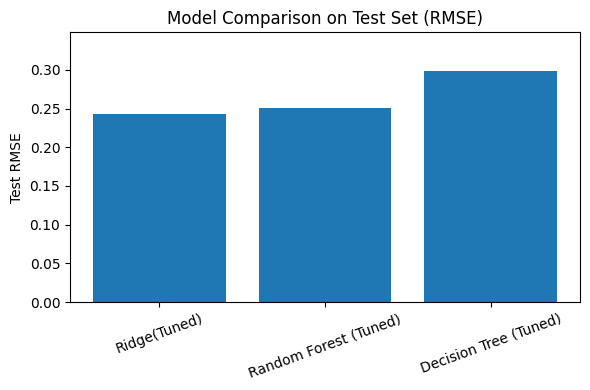

In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score


def cv_rmse(model, X, y, cv=5):
    """
    Compute cross-validated RMSE for a regression model.
    """
    scores = cross_val_score(
        model,
        X,
        y,
        cv=cv,
        scoring="neg_mean_squared_error"
    )
    return np.sqrt(-scores.mean())


models = {
    best_lg_name + "(Tuned)": best_lg,      # fitted best estimator from Linear Regression GridSearchCV
    "Random Forest (Tuned)": best_rf,       # fitted best estimator from RF GridSearchCV
    "Decision Tree (Tuned)": best_dt        # fitted best estimator from DT GridSearchCV

}

results = []

for name, model in models.items():
    #Cross-validated RMSE
    cv_score = cv_rmse(model, X_train, y_train, cv=5)

    # Test RMSE
    y_pred = model.predict(X_test)
    test_rmse = mean_squared_error(y_test, y_pred)  # sqrt(MSE)

    results.append({
        "Model": name,
        "CV_RMSE": cv_score,
        "Test_RMSE": test_rmse
    })

#Table of results
results_df = pd.DataFrame(results)
display(results_df)

# evaluation plot for the rubric (regression metric visualization)
plt.figure(figsize=(6, 4))
plt.bar(results_df["Model"], results_df["Test_RMSE"])
plt.ylabel("Test RMSE")
plt.title("Model Comparison on Test Set (RMSE)")
plt.xticks(rotation=20)
plt.ylim(0, max(results_df["Test_RMSE"]) + 0.05)  # add some space above bars
plt.tight_layout()
plt.show()
